In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pleasant
from pleasant.loaders.qudi import load_qudi_folder

### Unpack example data

In [2]:
from shutil import unpack_archive
from os.path import isdir

if not isdir('example_data'):
    unpack_archive('example_data.zip', 'example_data')

## Data loading
Load data files and generate a list of measurement objects. The `break_duration` argument denotes the time in seconds between subsequent scans. It is of relevance for calculating the spectral diffusion rate later.

In [3]:
measurements = load_qudi_folder('example_data/', break_duration=0.15)

Not all wavemeter readings successful (99.01%).
Not all wavemeter readings successful (98.39%).
Not all wavemeter readings successful (98.28%).
Not all wavemeter readings successful (98.84%).
Not all wavemeter readings successful (99.57%).
Not all wavemeter readings successful (99.66%).
Not all wavemeter readings successful (99.42%).
Not all wavemeter readings successful (99.48%).
Not all wavemeter readings successful (97.73%).
Not all wavemeter readings successful (99.62%).
Not all wavemeter readings successful (98.84%).
Not all wavemeter readings successful (99.71%).
Not all wavemeter readings successful (99.35%).
Not all wavemeter readings successful (99.32%).
Not all wavemeter readings successful (97.92%).
Not all wavemeter readings successful (98.86%).


## Sum of scans plot
Plot a handy overview of a few measurements and try to fit a Gaussian to the sum of scans.

Measurement
20210223-1618-22 | D4_WM_NoInit_6nW_05Vs | -1 direction
Scan over 5.90 GHz at 5.90 GHz/s
Measurement
20210223-1618-22 | D4_WM_NoInit_6nW_05Vs | +1 direction
Scan over 5.91 GHz at 5.91 GHz/s


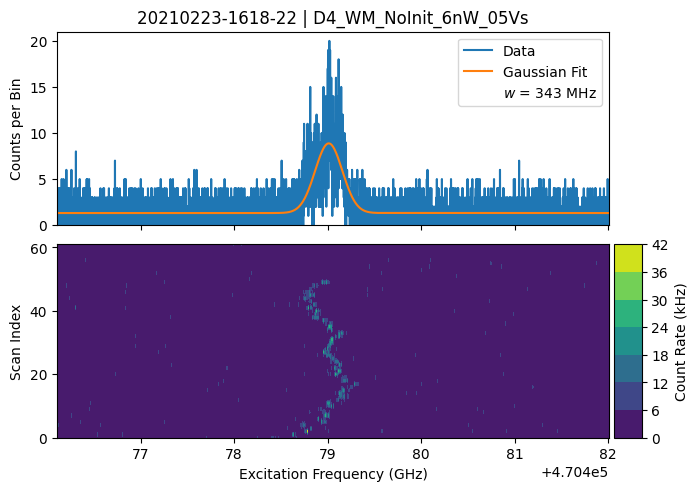

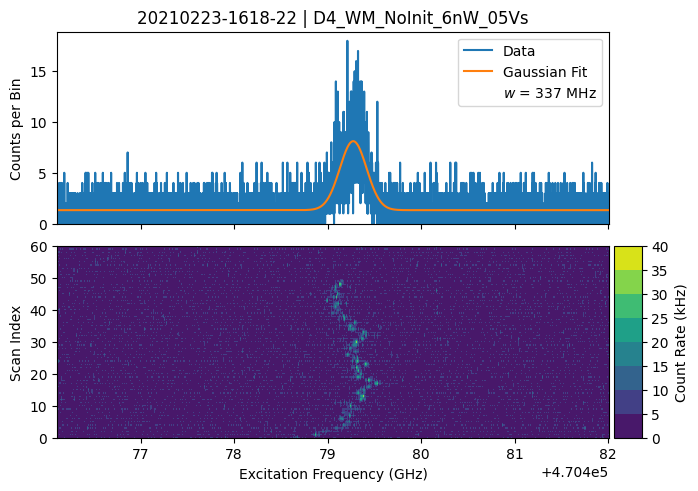

In [4]:
measurements_6nW = [m for m in measurements if '6nW' in m.description]
for m in measurements_6nW[:2]:
    m.print_info()
    m.plot_sum_of_scans()

## Fit scans

Multiple things are done here, separately for each measurement:
- rebin data to 4 MHz resolution
- apply a mask: mark scans that have at least three photons in at least one bin
- fit all scans with a peak-like function
- export the scan fit results as a pandas dataframe

The fitting can take a few minutes.

In [5]:
df_list = []
for m in measurements:
    m.print_info()
    m.rebin_data(target_bin_width=4e6)
    m.photon_count_filter(3)
    m.fit_scans(model_name='Voigt')
    df_list.append(m.scan_fit_data)

# concatenate the data frames together
df = pd.concat(df_list, ignore_index=True)

Measurement
20210322-1250-38 | D4_WM_NoInit_12nW_05Vs_redgreen | -1 direction
Scan over 5.84 GHz at 5.84 GHz/s
Rebinned from 1.0 to 3.9 MHz/bin, trimming 2 bin(s).
Measurement
20210322-1250-38 | D4_WM_NoInit_12nW_05Vs_redgreen | +1 direction
Scan over 5.84 GHz at 5.84 GHz/s
Rebinned from 1.0 to 3.9 MHz/bin, trimming 2 bin(s).
Measurement
20210223-1618-22 | D4_WM_NoInit_6nW_05Vs | -1 direction
Scan over 5.90 GHz at 5.90 GHz/s
Rebinned from 1.0 to 3.9 MHz/bin, trimming 2 bin(s).
Measurement
20210223-1618-22 | D4_WM_NoInit_6nW_05Vs | +1 direction
Scan over 5.91 GHz at 5.91 GHz/s
Rebinned from 1.0 to 3.9 MHz/bin, trimming 2 bin(s).
Measurement
20210322-1409-26 | D4_WM_NoInit_12nW_05Vs_redgreen | -1 direction
Scan over 5.86 GHz at 5.86 GHz/s
Rebinned from 1.0 to 3.9 MHz/bin, trimming 2 bin(s).
Measurement
20210322-1409-26 | D4_WM_NoInit_12nW_05Vs_redgreen | +1 direction
Scan over 5.86 GHz at 5.86 GHz/s
Rebinned from 1.0 to 3.9 MHz/bin, trimming 2 bin(s).
Measurement
20210322-1301-44 | D4_WM

The dataframe contains all fitted parameters as well as all measurement metadata. That should make any follow-up analyis very accessible, e.g. plotting linewidth against excitation power.

In [6]:
df

,timestamp,description,direction,scan_speed,scan_range,break_duration,bin_width,fit_model,scan_index,fwhm,height,center,c,max_rate_in_fwhm,fwhm_stderr,height_stderr,center_stderr,c_stderr
0,20210322-1250-38,D4_WM_NoInit_12nW_05Vs_redgreen,-1,5.836862e+09,5.836862e+09,0.15,3.886060e+06,Voigt,0,2.399512e+07,12979.523787,4.704798e+14,169.250435,16500.0,1.841284e+06,612.099095,423032.104132,18.755843
1,20210322-1250-38,D4_WM_NoInit_12nW_05Vs_redgreen,-1,5.836862e+09,5.836862e+09,0.15,3.886060e+06,Voigt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210322-1250-38,D4_WM_NoInit_12nW_05Vs_redgreen,-1,5.836862e+09,5.836862e+09,0.15,3.886060e+06,Voigt,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210322-1250-38,D4_WM_NoInit_12nW_05Vs_redgreen,-1,5.836862e+09,5.836862e+09,0.15,3.886060e+06,Voigt,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210322-1250-38,D4_WM_NoInit_12nW_05Vs_redgreen,-1,5.836862e+09,5.836862e+09,0.15,3.886060e+06,Voigt,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,20210322-1335-27,D4_WM_NoInit_12nW_05Vs_redgreen,1,5.856079e+09,5.856079e+09,0.15,3.898854e+06,Voigt,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7928,20210322-1335-27,D4_WM_NoInit_12nW_05Vs_redgreen,1,5.856079e+09,5.856079e+09,0.15,3.898854e+06,Voigt,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7929,20210322-1335-27,D4_WM_NoInit_12nW_05Vs_redgreen,1,5.856079e+09,5.856079e+09,0.15,3.898854e+06,Voigt,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7930,20210322-1335-27,D4_WM_NoInit_12nW_05Vs_redgreen,1,5.856079e+09,5.856079e+09,0.15,3.898854e+06,Voigt,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A pandas dataframe comes with a lot of useful methods, e.g. saving to a CSV file:

In [7]:
df.to_csv('scan_data.csv')

All unique entries in the measurement descriptions column:

In [8]:
df['description'].unique().tolist()

['D4_WM_NoInit_12nW_05Vs_redgreen', 'D4_WM_NoInit_6nW_05Vs']

## Plot an individual scan

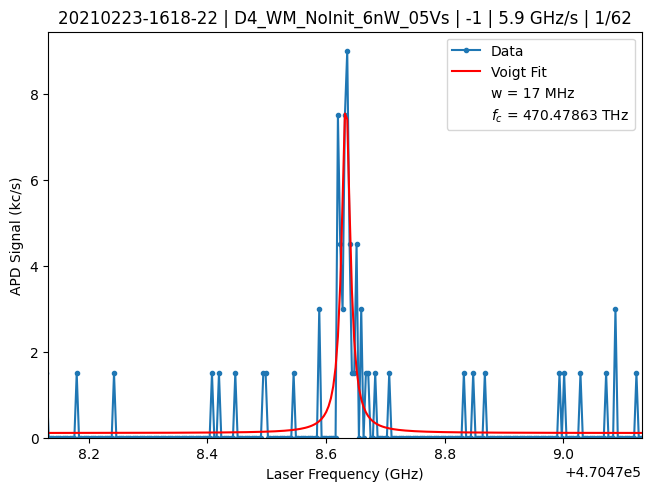

In [9]:
_ = measurements_6nW[0].plot_individual_scan(1, freq_range=1e9)

## Linewidth histogram

- extract all linewidths from each unique measurement description (indicating e.g. common excitation power)
- calculate inverse variance weighted average and error
- plot a linewidth histogram

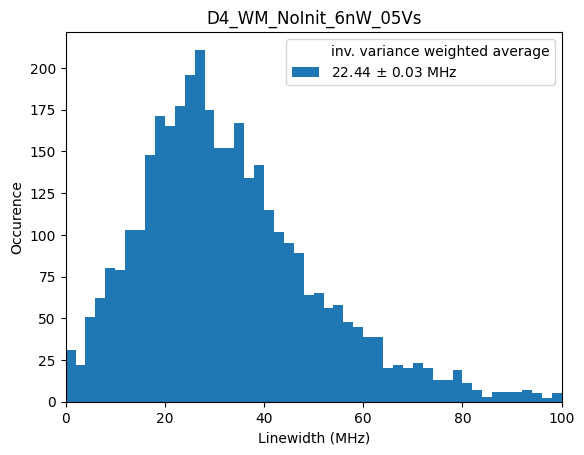

In [10]:
# select all rows in dataframe that match the description
d = 'D4_WM_NoInit_6nW_05Vs'
df_sel = df[df['description'] == d]

# extract linewidths and their errors from the dataframe
fwhm = 1e-6 * df_sel[['fwhm', 'fwhm_stderr']].to_numpy()
not_nan = np.sum(~np.isnan(fwhm[:, 0]))
avg, std = pleasant.inv_variance_weighting(fwhm)

# plotting the histogram
fig, ax = plt.subplots()
ax.plot([], [], 'w', label='inv. variance weighted average')
ax.hist(fwhm[:, 0], bins=50, range=(0, 100), label=f'{avg:.2f} $\pm$ {std:.2f} MHz')
ax.autoscale(axis='x', tight=True)
ax.set_xlabel('Linewidth (MHz)')
ax.set_ylabel('Occurence')
ax.legend()
ax.set_title(d)
plt.show()

## Spectral diffusion rate histogram

The spectral diffusion rate is the time-normalized spectral jump of the resonance from one scan to the next. 

D4_WM_NoInit_12nW_05Vs_redgreen
Total number of scans: 4165
Scans with fit:        2983 (72%)
Consecutive with fit:  2578 (62%)


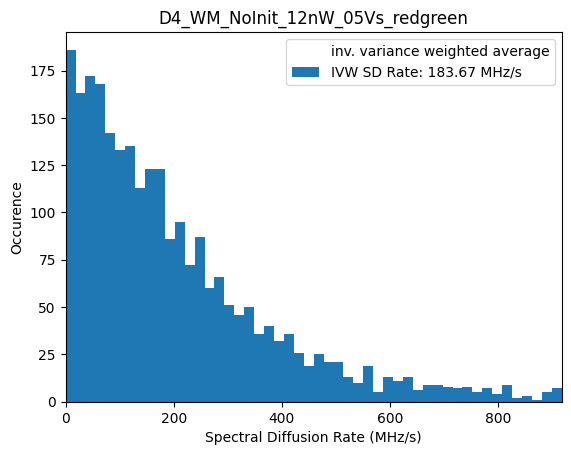

D4_WM_NoInit_6nW_05Vs
Total number of scans: 3767
Scans with fit:        3599 (96%)
Consecutive with fit:  3554 (94%)


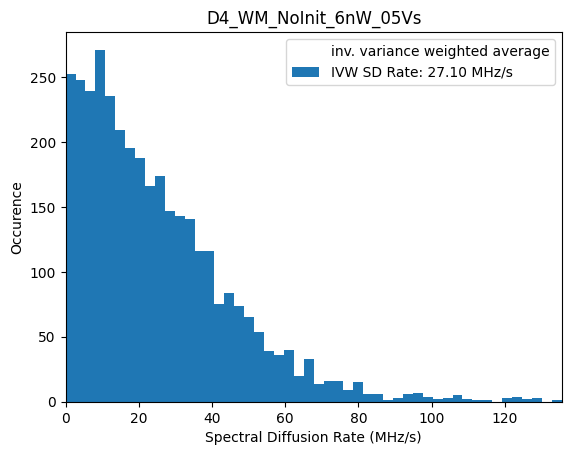

In [11]:
for d in df['description'].unique():
    print(d)
    df_sel = df[df['description'] == d]
    
    # compute the spectral diffusion rates based on
    # fitted resonance center frequencies and the time in between scans
    rates = 1e-6 * pleasant.get_spectral_diffusion_rates(df_sel)
    avg, std = pleasant.inv_variance_weighting(rates)
    cutoff = 5 * avg
     
    # plotting the histogram
    fig, ax = plt.subplots()
    ax.plot([], [], 'w', label='inv. variance weighted average')
    ax.hist(rates[:, 0], bins=50, range=(0, cutoff), label=f'IVW SD Rate: {avg:.2f} MHz/s')
    ax.autoscale(axis='x', tight=True)
    ax.set_xlabel('Spectral Diffusion Rate (MHz/s)')
    ax.set_ylabel('Occurence')
    ax.legend()
    ax.set_title(d)
    plt.show()